### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Supressing Scientific Notation
pd.options.display.float_format = '{:20,.2f}'.format

### Loading the Data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


### Checking Missing Values

In [3]:
raw_data.isna().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [4]:
raw_data[raw_data['author'].isna()]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


Note : This talk has multiple speakers. Thats why the value is NaN

In [5]:
raw_data.sort_values(['views'],ascending=False).head(10)

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...
3504,How to speak so that people want to listen,Julian Treasure,June 2013,49000000,1400000,https://ted.com/talks/julian_treasure_how_to_s...
2168,My philosophy for a happy life,Sam Berns,October 2013,43000000,1300000,https://ted.com/talks/sam_berns_my_philosophy_...
3251,The next outbreak? We're not ready,Bill Gates,March 2015,43000000,1300000,https://ted.com/talks/bill_gates_the_next_outb...
3017,What makes a good life? Lessons from the longe...,Robert Waldinger,November 2015,41000000,1200000,https://ted.com/talks/robert_waldinger_what_ma...
3994,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,October 2012,38000000,1100000,https://ted.com/talks/cameron_russell_looks_ar...


- Top 10 Ted Talks videos based on views.

In [6]:
raw_data.sort_values(['likes'],ascending=False).head(10)

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
3504,How to speak so that people want to listen,Julian Treasure,June 2013,49000000,1400000,https://ted.com/talks/julian_treasure_how_to_s...
2168,My philosophy for a happy life,Sam Berns,October 2013,43000000,1300000,https://ted.com/talks/sam_berns_my_philosophy_...
3251,The next outbreak? We're not ready,Bill Gates,March 2015,43000000,1300000,https://ted.com/talks/bill_gates_the_next_outb...
3017,What makes a good life? Lessons from the longe...,Robert Waldinger,November 2015,41000000,1200000,https://ted.com/talks/robert_waldinger_what_ma...
4990,10 things you didn't know about orgasm,Mary Roach,February 2009,37000000,1100000,https://ted.com/talks/mary_roach_10_things_you...


- Top 10 Ted Talks videos based on likes.

### Checking Duplicate Values

In [7]:
len(raw_data[raw_data.duplicated() == True])

0

### Checking Each Columns Datatypes

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [9]:
raw_data.describe()

,views,likes
count,"5,440.00","5,440.00"
mean,"2,061,575.96","62,607.62"
std,"3,567,097.77","107,646.77"
min,532.00,15.00
25%,"670,750.00","20,000.00"
50%,"1,300,000.00","40,500.00"
75%,"2,100,000.00","65,000.00"
max,"72,000,000.00","2,100,000.00"


### Dropping the missing value and unnecessary column

In [10]:
data_cleaned = raw_data.dropna()
data_cleaned = data_cleaned.drop('link',axis=1)

In [11]:
#Checking missing values
data_cleaned.isna().sum()

title     0
author    0
date      0
views     0
likes     0
dtype: int64

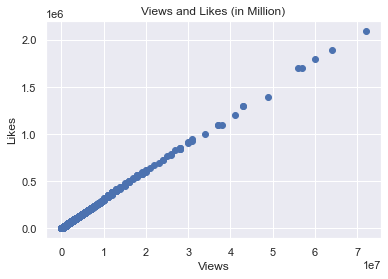

In [12]:
#Correlation between views and likes
plt.scatter(data_cleaned['views'],data_cleaned['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views and Likes (in Million)')
plt.show()

Looks likes a straight line. Which meant that as the views goes up, the likes count goes up too!

### Extracting Year and Month from the Date Column

In [13]:
#changing the date column into datetime
#so we can extract the month and year
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.head()

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72


In [14]:
#Extracting the month and year from the date column. And then dropping the date column
data_cleaned['year'] = pd.DatetimeIndex(data_cleaned['date']).year
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['date']).month
data_cleaned = data_cleaned.drop('date',axis=1)
data_cleaned.head()

,title,author,views,likes,year,month
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,2021,12
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,2022,2
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,2021,10
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,2021,10


In [15]:
#Rearranging the Columns
data_cleaned.columns.values

array(['title', 'author', 'views', 'likes', 'year', 'month'], dtype=object)

In [16]:
data_cleaned = data_cleaned[['title', 'author', 'month','year','likes','views']]
data_cleaned.head()

,title,author,month,year,likes,views
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,12,2021,12000,404000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2,2022,6400,214000
2,How play can spark new ideas for your business,Martin Reeves,9,2021,12000,412000
3,Why is China appointing judges to combat clima...,James K. Thornton,10,2021,12000,427000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,10,2021,72,2400


### Finding Average Likes and Views from Each Year

In [17]:
#we can check each year like this
#Lets say we want to check TedTalks that occur in 2002
data_cleaned[data_cleaned['year'] ==  2002].describe()

,month,year,likes,views
count,26.00,26.00,26.00,26.00
mean,2.08,"2,002.00","35,219.23","1,170,846.15"
std,0.27,0.00,"36,965.74","1,221,136.97"
min,2.00,"2,002.00","6,700.00","225,000.00"
25%,2.00,"2,002.00","18,250.00","629,000.00"
50%,2.00,"2,002.00","25,000.00","858,500.00"
75%,2.00,"2,002.00","33,750.00","1,100,000.00"
max,3.00,"2,002.00","192,000.00","6,400,000.00"


- From the table above, we got that the average views for Ted Talks video in 2002 is 1,170,846. And the average likes is 35,219.

In [18]:
#or maybe more recent one, like 2018
data_cleaned[data_cleaned['year'] ==  2018].describe()

,month,year,likes,views
count,473.00,473.00,473.00,473.00
mean,7.58,"2,018.00","52,159.60","1,716,400.84"
std,3.27,0.00,"54,188.66","1,769,994.79"
min,1.00,"2,018.00",40.00,"1,300.00"
25%,4.00,"2,018.00","10,000.00","352,000.00"
50%,8.00,"2,018.00","48,000.00","1,600,000.00"
75%,11.00,"2,018.00","68,000.00","2,200,000.00"
max,12.00,"2,018.00","435,000.00","14,000,000.00"


- In 2018, the average views for each video is 1,716,400. While the average likes is 52,159

In [19]:
#making new tables
table = {'views':[],'likes':[], 'month':[],'year':[]}
average_table = pd.DataFrame(table)

In [20]:
#inputing the average data in the table
for i in range (1970,2023):
    average_table = average_table.append(data_cleaned[data_cleaned['year'] == i].mean(),ignore_index=True)
average_table.head()

C:\Users\user\AppData\Local\Temp/ipykernel_13204/784053872.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_table = average_table.append(data_cleaned[data_cleaned['year'] == i].mean(),ignore_index=True)


,views,likes,month,year,author,title
0,"126,000.00","3,750.00",1.00,"1,970.00",NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,300,000.00","41,000.00",5.00,"1,972.00",NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


### Yearly

In [21]:
#dropping author, month, and title column (for year)
average_table = average_table.drop(['author','title','month'],axis=1)

In [22]:
#checking missing values in average_table
average_table.isna().sum()

views    23
likes    23
year     23
dtype: int64

In [23]:
#dropping missing value
average_table = average_table.dropna()

In [24]:
#checking missing value
average_table.isna().sum()

views    0
likes    0
year     0
dtype: int64

In [25]:
#checking duplicates
len(average_table[average_table.duplicated() == True])

0

In [26]:
average_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 52
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   30 non-null     float64
 1   likes   30 non-null     float64
 2   year    30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [27]:
#changing data type in year to int
data_types = {'year':int}
average_table = average_table.astype(data_types)
average_table = average_table.reset_index()

In [28]:
#dropping index column that we got from reset_index()
average_table = average_table.drop('index',axis = 1)
average_table = average_table[['year','views','likes']]

### Visualizing Views and Likes per Year

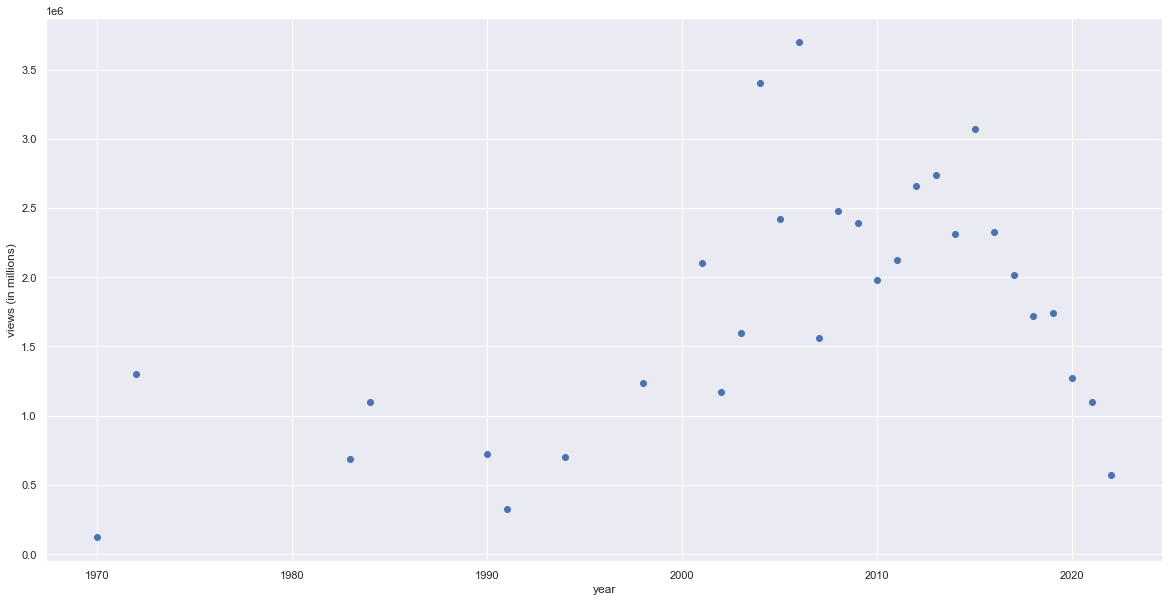

In [29]:
#scatterplot for views
plt.figure(figsize=(20,10))
plt.scatter(average_table['year'],average_table['views'])
plt.xlabel('year')
plt.ylabel('views (in millions)')
plt.show()

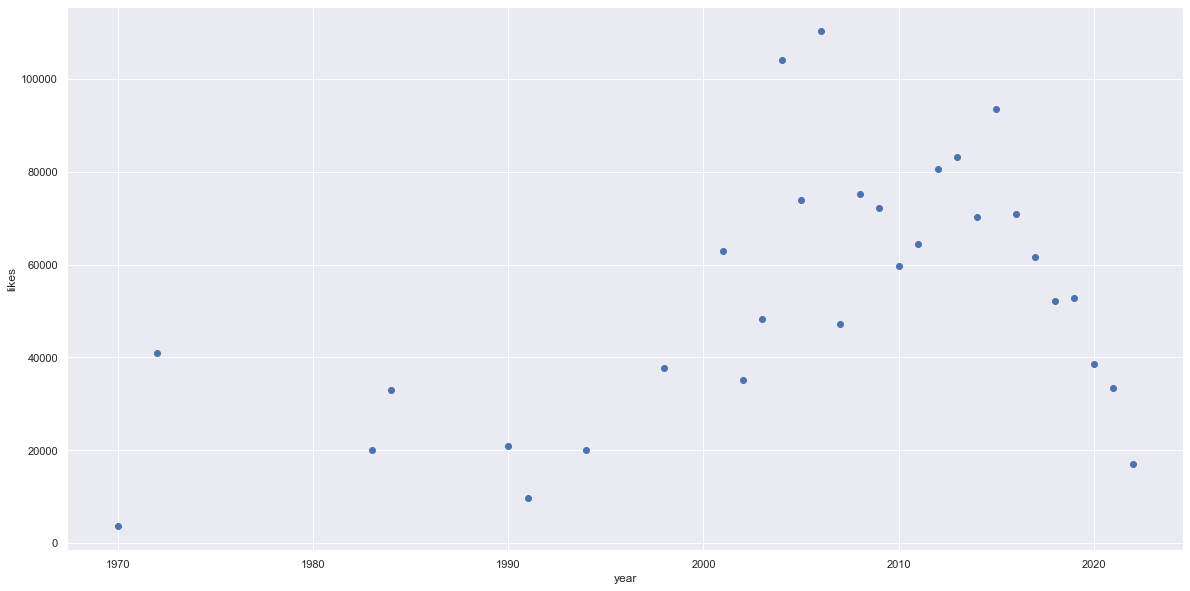

In [30]:
#scatterplot for likes
plt.figure(figsize=(20,10))
plt.scatter(average_table['year'],average_table['likes'])
plt.xlabel('year')
plt.ylabel('likes')
plt.show()

- Like the correlation we find earlier, the shape of like and views based on year in pretty similiar.

### How many TedTalks Videos are posted each year?

In [31]:
video_counts = data_cleaned['year'].value_counts()
video_counts_year = pd.DataFrame(video_counts).reset_index()
video_counts_year.columns = ['year','video_counts']
video_counts_year.head()

,year,video_counts
0,2019,544
1,2020,501
2,2017,495
3,2018,473
4,2016,399


### Summary of Views (Each Year)

In [32]:
views_table = average_table.drop('likes',axis=1)
views_table.sort_values(by=['views','year'],ascending=False)

,year,views
13,2006,"3,696,122.43"
11,2004,"3,405,393.94"
22,2015,"3,071,115.95"
20,2013,"2,738,498.70"
19,2012,"2,659,556.29"
15,2008,"2,476,285.70"
12,2005,"2,422,738.45"
16,2009,"2,393,283.26"
23,2016,"2,328,057.38"
21,2014,"2,309,950.41"


In [33]:
max_view = views_table['views'].max()
avg_view = views_table['views'].mean()
min_view = views_table['views'].min()

In [34]:
#Printing max, avg, min views
print(f'The most views in a year for Ted Talks, with {round(max_view,1)} views.')
print(f'Average views in each year from 1970-2022 is {round(avg_view,1)} views.')
print(f'The lowest views count in a year for Ted Talks video is {min_view} views')

The most views in a year for Ted Talks, with 3696122.4 views.
Average views in each year from 1970-2022 is 1755508.4 views.
The lowest views count in a year for Ted Talks video is 126000.0 views


### When Maximum and Minimum views happens?

In [35]:
#Maximum Views
views_table[views_table['views'] == views_table['views'].max()]

,year,views
13,2006,"3,696,122.43"


In [36]:
#Minimum Views
views_table[views_table['views'] == views_table['views'].min()]

,year,views
0,1970,"126,000.00"


- We got how each year is trending. But i want to dive deeper, to know how each video in each year does.

### Summary of Views (Each Video)

In [37]:
#merging views_table and video_counts_year.
new_views = pd.merge(views_table,video_counts_year,on='year',how='left')
new_views = new_views[new_views['video_counts'] > 10]
#I decided to remove year when there are less than 10 videos, because the data seems so strange.
new_views.head()

,year,views,video_counts
9,2002,"1,170,846.15",26
10,2003,"1,599,823.53",34
11,2004,"3,405,393.94",33
12,2005,"2,422,738.45",65
13,2006,"3,696,122.43",49


In [38]:
#counting average views from each videos
new_views['avg_views'] = new_views['views']/new_views['video_counts']
new_views.sort_values(['video_counts'],ascending=False)

,year,views,video_counts,avg_views
26,2019,"1,742,866.36",544,"3,203.80"
27,2020,"1,269,349.70",501,"2,533.63"
24,2017,"2,017,962.83",495,"4,076.69"
25,2018,"1,716,400.84",473,"3,628.75"
23,2016,"2,328,057.38",399,"5,834.73"
28,2021,"1,101,868.46",390,"2,825.30"
20,2013,"2,738,498.70",388,"7,057.99"
22,2015,"3,071,115.95",376,"8,167.86"
21,2014,"2,309,950.41",357,"6,470.45"
19,2012,"2,659,556.29",302,"8,806.48"


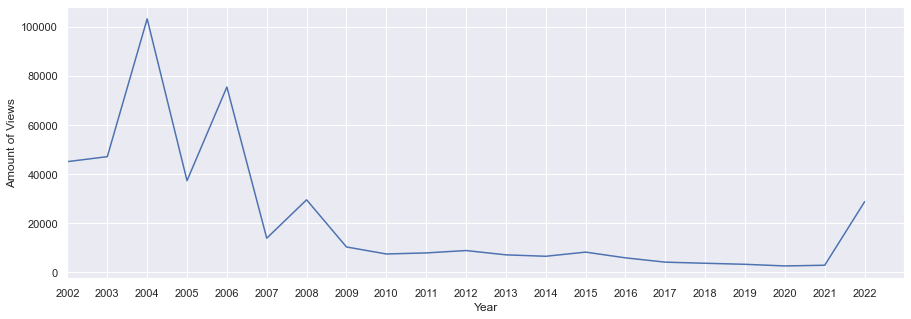

In [39]:
#visualization of views average in each video, each year.
plt.figure(figsize=(15,5))
plt.plot(new_views['year'],new_views['avg_views'])
plt.xlabel('Year')
plt.xticks(new_views['year'])
plt.xlim(2002)
plt.ylabel('Amount of Views')
plt.show()

- We got different interpretation in this. Based on Ammount of views per videos, between 2003-2006 i consider it as the peak of Ted Talks video. Because each video on average got above 40k views. And in 2004, each video got 103k views.

### Summary of Likes (Each Year)

In [40]:
likes_table = average_table.drop('views',axis=1)

In [41]:
likes_table.sort_values(by=['likes','year'],ascending=False)

,year,likes
13,2006,"110,232.65"
11,2004,"104,133.33"
22,2015,"93,488.69"
20,2013,"83,118.34"
19,2012,"80,566.92"
15,2008,"75,147.62"
12,2005,"73,923.08"
16,2009,"72,281.12"
23,2016,"70,944.32"
21,2014,"70,242.76"


In [42]:
max_likes = likes_table['likes'].max()
avg_likes = likes_table['likes'].mean()
min_likes = likes_table['likes'].min()

In [43]:
#Printing Max, Avg, and Min likes
print(f'Highest count of likes in a year for a TedTalks video is {round(max_likes,1)}.')
print(f'Average likes in each TedTalks video is {round(avg_likes,1)}.')
print(f'Lowest likes TedTalks video in a yearly basis is {round(min_likes,1)}.')

Highest count of likes in a year for a TedTalks video is 110232.7.
Average likes in each TedTalks video is 53133.9.
Lowest likes TedTalks video in a yearly basis is 3750.0.


### When Maximum and Minimum Likes occured?

In [44]:
#Maximum Likes
likes_table[likes_table['likes'] == likes_table['likes'].max()]

,year,likes
13,2006,"110,232.65"


In [45]:
#Minimum Likes
likes_table[likes_table['likes'] == likes_table['likes'].min()]

,year,likes
0,1970,"3,750.00"


### Summary of Likes (Each Video)

In [46]:
#merging likes_table and video_counts_year.
new_likes = pd.merge(likes_table,video_counts_year, on='year',how='left')
new_likes = new_likes[new_likes['video_counts'] > 10]
new_likes.head()

,year,likes,video_counts
9,2002,"35,219.23",26
10,2003,"48,247.06",34
11,2004,"104,133.33",33
12,2005,"73,923.08",65
13,2006,"110,232.65",49


In [47]:
#Counting the average likes from each videos
new_likes['avg_likes'] = new_likes['likes']/new_likes['video_counts']
new_likes.sort_values(['avg_likes'],ascending=False)

,year,likes,video_counts,avg_likes
11,2004,"104,133.33",33,"3,155.56"
13,2006,"110,232.65",49,"2,249.65"
10,2003,"48,247.06",34,"1,419.03"
9,2002,"35,219.23",26,"1,354.59"
12,2005,"73,923.08",65,"1,137.28"
15,2008,"75,147.62",84,894.61
29,2022,"17,062.70",20,853.13
14,2007,"47,186.73",113,417.58
16,2009,"72,281.12",233,310.22
19,2012,"80,566.92",302,266.78


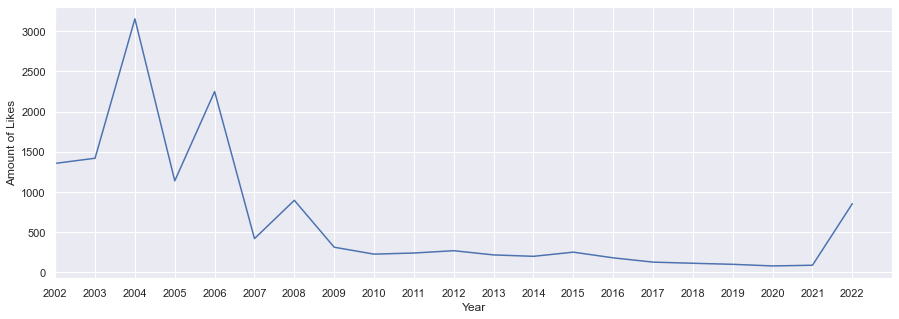

In [48]:
#visualization of avg like in each video, each year.
plt.figure(figsize=(15,5))
plt.plot(new_likes['year'],new_likes['avg_likes'])
plt.xlabel('Year')
plt.xticks(new_likes['year'])
plt.xlim(2002)
plt.ylabel('Amount of Likes')
plt.show()

- Same as in views, i consider the peak of Ted Talks videos are between 2003-2006. After that, the likes count on every videos just plateaued. Especially form 2009 onwards.